Assignment 4

In [3]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import salem
import cartopy.crs as ccrs
import pandas as pd
from dask.diagnostics import ProgressBar
import cartopy.feature as cfeature

A

Shared Socio-economic Pathways (SSPs) describe five broad scenarios of socio-economic
development in the context of different climate mitigation assumptions. The five scenarios
comprise SSP1-1.9, SSP2-2.6, SSP2-4.5, SSP3-7.0, and SSP5-8.5. SSP1-1.9 assumes
sustainability with extremely low emissions and a 1.5 degree increase in temperature. SSP2-
2.6 assumes low emissions with a 2 degrees temperature increase. SSP2-4.5 assumes
moderate emissions with a 2.7 degrees temperature increase. SSP3-7.0 assumes high
emissions with a 3 degrees temperature increase. SSP5-8.5 assumes very high emissions
with a greater than 4 degrees temperature increase.

B

1)

TX25

TX25 is the number of hot days which is documented as the number of days with
temperatures greater than 25 degrees Celsius. Hot days increase the moisture the air can
hold thereby decreasing the relative humidity, help start fires, and generally result in less
stable atmospheres.  

DD1mm

DD1mm is the number of dry days which is documented as the number of days below 1mm
of rain. The number of dry days increases the susceptibility of vegetation in becoming
flammable.

Wd10

Wd10 is the number of windy days where the wind speed is greater than 10m/s. Wind
speed increases the chances of fires developing into larger hazards providing ventilation
with oxygen, assist in spreading the fire through embers and laying over the flames.

2)

1986-2005 and 1995-2014

C

1)

Number of Hot Days (>25 Celcius)

In [56]:
TX1 = xr.open_dataset("TX25_ssp126_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [19]:
TX2 = xr.open_dataset("TX25_ssp126_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [20]:
TX3 = xr.open_dataset("TX25_ssp245_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [21]:
TX4 = xr.open_dataset("TX25_ssp245_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [22]:
TX5 = xr.open_dataset("TX25_ssp370_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [23]:
TX6 = xr.open_dataset("TX25_ssp370_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [32]:
TX_SSP1 = TX1 + TX2 #SSP1 for hot days

In [33]:
TX_SSP2 = TX3 + TX4 #SSP2 for hot days

In [34]:
TX_SSP3 = TX5 + TX6 #SSP3 for hot days

Number of Dry Days (Rainfall <1mm)

In [25]:
DD1 = xr.open_dataset("DD1mm_ssp126_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [26]:
DD2 = xr.open_dataset("DD1mm_ssp126_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [27]:
DD3 = xr.open_dataset("DD1mm_ssp245_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [28]:
DD4 = xr.open_dataset("DD1mm_ssp245_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [29]:
DD5 = xr.open_dataset("DD1mm_ssp370_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [35]:
DD6 = xr.open_dataset("DD1mm_ssp370_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [37]:
DD_SSP1 = DD1 + DD2 #SSP1 for dry days

In [38]:
DD_SSP2 = DD3 + DD4 #SSP2 for dry days

In [40]:
DD_SSP3 = DD5 + DD6 #SSP3 for dry days

Number of Windy Days (Wind Speed >10m/s)

In [41]:
Wd1 = xr.open_dataset("Wd10_ssp126_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [42]:
Wd2 = xr.open_dataset("Wd10_ssp126_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [191]:
Wd3 = xr.open_dataset("Wd10_ssp245_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [190]:
Wd4 = xr.open_dataset("Wd10_ssp245_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [192]:
Wd5 = xr.open_dataset("Wd10_ssp370_MMM_CCAM_change_fp2021-2040_bp1986-2005_ANN_NZ5km.nc")

In [193]:
Wd6 = xr.open_dataset("Wd10_ssp370_MMM_CCAM_change_fp2021-2040_bp1995-2014_ANN_NZ5km.nc")

In [204]:
Wd_SSP1 = Wd1 + Wd2 #SSP1 for windy days

In [205]:
Wd_SSP2 = Wd3 + Wd4 #SSP2 for windy days

In [206]:
Wd_SSP3 = Wd5 + Wd6 #SSP3 for windy days

Approximating the Fire Weather Index (FWI)

In [130]:
SSP1_AFW = TX_SSP1 + DD_SSP1 + Wd_SSP1

In [95]:
SSP2_AFW = TX_SSP2 + DD_SSP2 + Wd_SSP2

In [96]:
SSP3_AFW = TX_SSP3 + DD_SSP3 + Wd_SSP3

SSP1 Maps for Variables

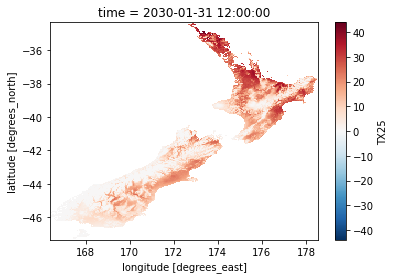

In [139]:
plt.figure()
TX_SSP1.TX25.plot()

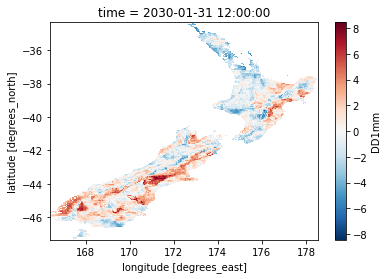

In [140]:
plt.figure()
DD_SSP1.DD1mm.plot()

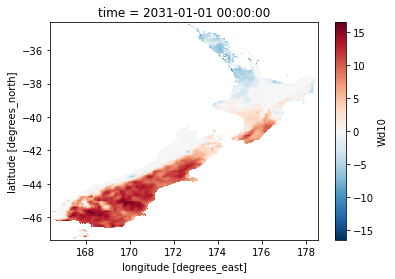

In [141]:
plt.figure()
Wd_SSP1.Wd10.plot()

SSP2 Maps for Variables

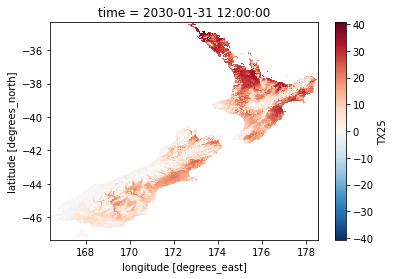

In [142]:
plt.figure()
TX_SSP2.TX25.plot()

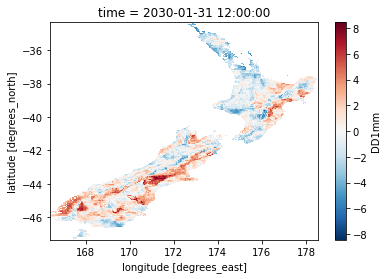

In [208]:
plt.figure()
DD_SSP1.DD1mm.plot()

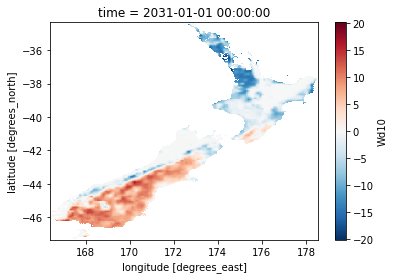

In [207]:
plt.figure()
Wd_SSP2.Wd10.plot()

SSP3 Maps for Variables

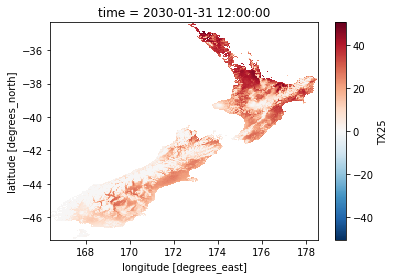

In [209]:
plt.figure()
TX_SSP3.TX25.plot()

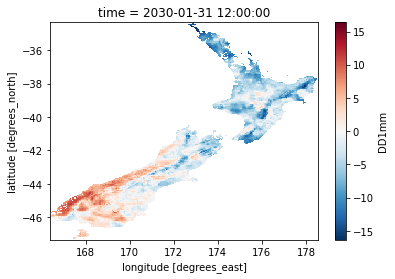

In [211]:
plt.figure()
DD_SSP3.DD1mm.plot()

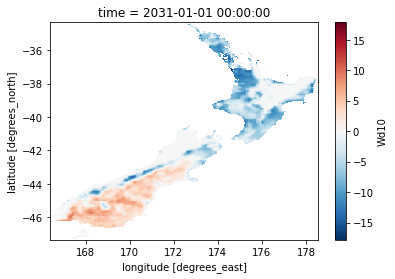

In [212]:
plt.figure()
Wd_SSP3.Wd10.plot()

The regions where climate extremes are predicted to be concentrated from 2021-2040 vary
little between SSP1, SSP2, and SSP3, showing that Canterbury and Otago are predicted to be
most vulnerable. For SSP1 the most impacted regions expected to have more days with
more hot days are Auckland, Northland, Canterbury, and Otago. The most impacted regions
for the expected number of dry days are Hawkes Bay, Canterbury, and Otago. Windy days
are expected to be most extreme within Canterbury, Otago, Southland, and Wellington. For
both SSP2 and SSP3 the regions expecting more hot days got more extreme while regions
wind speed was shown to be less extreme. However, for the expected number of dry days
while SSP2 was largely similar to SSP1, the North Island was shown to be substantially
wetter in SSP3. Despite this, Canterbury and Otago had the highest overlap of climate
extremes contributing to fire weather.

2)

Number of Hot Days (>25 Celcius)

In [64]:
TX1_2099 = xr.open_dataset("TX25_ssp126_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [65]:
TX2_2099 = xr.open_dataset("TX25_ssp126_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [66]:
TX3_2099 = xr.open_dataset("TX25_ssp245_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [67]:
TX4_2099 = xr.open_dataset("TX25_ssp245_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [68]:
TX5_2099 = xr.open_dataset("TX25_ssp370_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [69]:
TX6_2099 = xr.open_dataset("TX25_ssp370_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [70]:
TX_SSP1_2099 = TX1_2099 + TX2_2099 #SSP1 for hot days (2099)

In [71]:
TX_SSP2_2099 = TX3_2099 + TX4_2099 #SSP2 for hot days (2099)

In [72]:
TX_SSP3_2099 = TX5_2099 + TX6_2099 #SSP3 for hot days (2099)

Number of Dry Days (Rainfall <1mm)

In [73]:
DD1_2099 = xr.open_dataset("DD1mm_ssp126_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [74]:
DD2_2099 = xr.open_dataset("DD1mm_ssp126_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [75]:
DD3_2099 = xr.open_dataset("DD1mm_ssp245_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [76]:
DD4_2099 = xr.open_dataset("DD1mm_ssp245_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [77]:
DD5_2099 = xr.open_dataset("DD1mm_ssp370_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [78]:
DD6_2099 = xr.open_dataset("DD1mm_ssp370_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [79]:
DD_SSP1_2099 = DD1_2099 + DD2_2099 #SSP1 for dry days (2099)

In [80]:
DD_SSP2_2099 = DD3_2099 + DD4_2099 #SSP2 for dry days (2099)

In [81]:
DD_SSP3_2099 = DD5_2099 + DD6_2099 #SSP3 for dry days (2099)

Number of Windy Days (Wind Speed >10m/s)

In [82]:
Wd1_2099 = xr.open_dataset("Wd10_ssp126_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [83]:
Wd2_2099 = xr.open_dataset("Wd10_ssp126_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [84]:
Wd3_2099 = xr.open_dataset("Wd10_ssp245_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [85]:
Wd4_2099 = xr.open_dataset("Wd10_ssp245_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [86]:
Wd5_2099 = xr.open_dataset("Wd10_ssp370_MMM_CCAM_change_fp2080-2099_bp1986-2005_ANN_NZ5km.nc")

In [87]:
Wd6_2099 = xr.open_dataset("Wd10_ssp370_MMM_CCAM_change_fp2080-2099_bp1995-2014_ANN_NZ5km.nc")

In [88]:
Wd_SSP1_2099 = Wd1_2099 + Wd2_2099 #SSP1 for windy days (2099)

In [89]:
Wd_SSP2_2099 = Wd3_2099 + Wd4_2099 #SSP2 for windy days (2099)

In [90]:
Wd_SSP3_2099 = Wd5_2099 + Wd6_2099 #SSP3 for windy days (2099)

Approximating the Fire Weather Index (FWI)

In [91]:
SSP1_AFW_2099 = TX_SSP1_2099 + DD_SSP1_2099 + Wd_SSP1_2099

In [92]:
SSP2_AFW_2099 = TX_SSP2_2099 + DD_SSP2_2099 + Wd_SSP2_2099

In [93]:
SSP3_AFW_2099 = TX_SSP3_2099 + DD_SSP3_2099 + Wd_SSP3_2099

SSP1 Maps for Variables (2099)

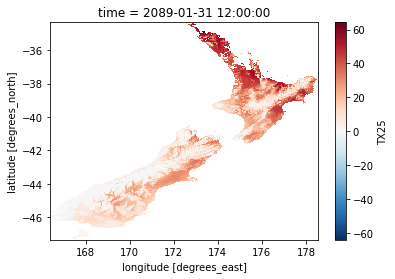

In [143]:
plt.figure()
TX_SSP1_2099.TX25.plot()

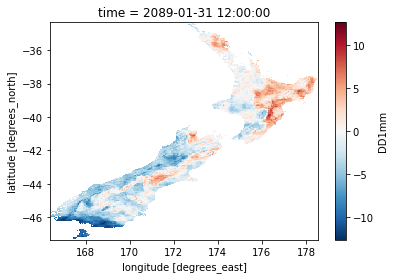

In [144]:
plt.figure()
DD_SSP1_2099.DD1mm.plot()

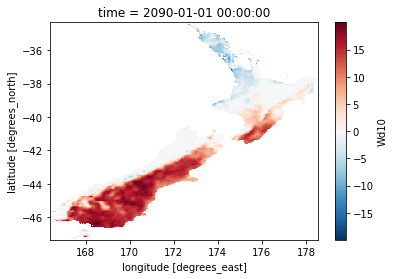

In [145]:
plt.figure()
Wd_SSP1_2099.Wd10.plot()

SSP2 Maps for Variables (2099)

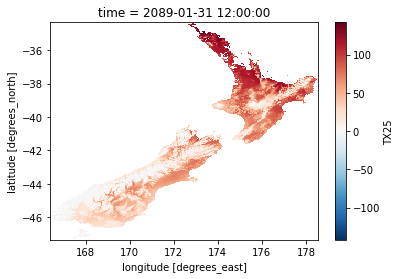

In [146]:
plt.figure()
TX_SSP2_2099.TX25.plot()

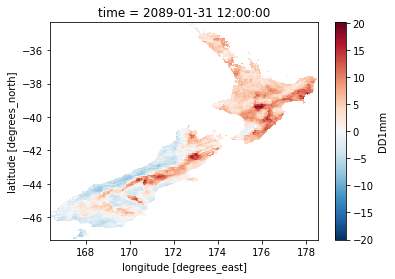

In [147]:
plt.figure()
DD_SSP2_2099.DD1mm.plot()

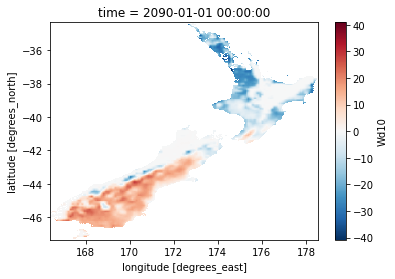

In [148]:
plt.figure()
Wd_SSP2_2099.Wd10.plot()

SSP3 Maps for Variables (2099)

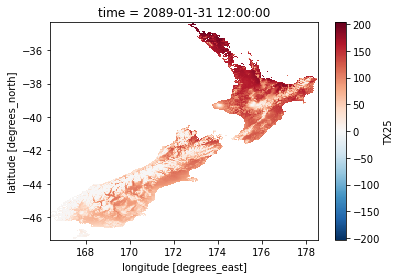

In [213]:
plt.figure()
TX_SSP3_2099.TX25.plot()

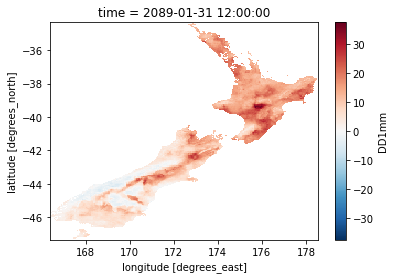

In [214]:
plt.figure()
DD_SSP3_2099.DD1mm.plot()

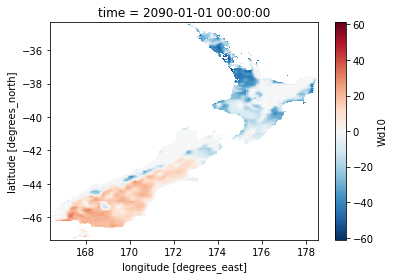

In [215]:
plt.figure()
Wd_SSP3_2099.Wd10.plot()

The regions where climate extremes are predicted to be concentrated from 2080-2090 vary
substantially between SSP1, SSP2, and SSP3, showing that Canterbury and Otago are
predicted to be most vulnerable. For SSP1 the most impacted regions expected to have
more days with more hot days are Auckland, Northland, Hawkes Bay, Bay of Plenty,
Canterbury, and Otago. The most impacted regions for the expected number of dry days are
Hawkes Bay, East Cape, Bay of Plenty, and Canterbury. Windy days are expected to be most
extreme within Canterbury, Otago, Southland, and Wellington. For both SSP2 and SSP3 the
regions expecting more hot days got more extreme while regions and the maximum number
of days increased from 60 in SSP1 to 200 in SSP3. The expected number of dry days for both
SSP2 and SSP3 got more extreme with the former encompassing the North Island and the
latter New Zealand, as well as increasing from maximum number of days from ~10 in SSP1
to about ~30 in SSP3. The North Island and northern half of the South Island got less windy,
but Canterbury and Otago had more windy days with the maximum number of days
increasing from about 20 in SSP1 to 60 in SSP3. Canterbury and Otago had the highest
overlap of climate extremes contributing to fire weather.

D

No, I do not trust these results in helping predict fire weather. The datasets that have been
provided are the number hot days (&gt;25 Celsius), dry days (&lt;1mm), and windy days (10m/s).
While these are factors contributing to fire weather there is a key omission that is important
to include. This factor is relative humidity as it helps in drying out vegetation supplying fuel
to the fire and making it more receptive to ignition. As such, I would also include a dataset
documenting relative humidity and that in the analysis.